In [1]:
from ENDFtk.tree import Tape
from NDSampler import NDSampler, SamplerSettings, generate_covariance_dict
import numpy as np
import glob
import matplotlib.pyplot as plt

endf_tape = Tape.from_file('/home/sole-pie01/ndlib/endfb8-neutron/n-094_Pu_239.endf')
# endf_tape = Tape.from_file('/home/sole-pie01/ndlib/tendl23-neutron/n-Fe056.tendl.txt')
# endf_tape = Tape.from_file('/home/sole-pie01/ndlib/endfb8-neutron/n-017_Cl_037.endf')
# endf_tape = Tape.from_file('/home/sole-pie01/ndlib/endfb8-neutron/n-010_Ne_021.endf')
covariance_dict = generate_covariance_dict(endf_tape)
del covariance_dict[31]
del covariance_dict[33]
del covariance_dict[34]
# del covariance_dict[32][151][1] #No URR
del covariance_dict[35]
covariance_dict

{32: {151: [0]}}

In [4]:
MAT = endf_tape.MAT(endf_tape.material_numbers[0])
mf32 = endf_tape.MAT(endf_tape.material_numbers[0]).MF(32).MT(151).parse()
mf32_range = mf32.isotopes[0].resonance_ranges[0]
unc = mf32_range.parameters.correlation_matrix
mf32_range.parameters.correlation_matrix.NNN
mf32_range.parameters.uncertainties.AJ[0]
# mf32_range.parameters.uncertainties.GFA.to_list()
# cm = mf32_range.parameters.correlation_matrix
# NNN = cm.NNN  # Order of the correlation matrix
# correlations = cm.correlations  # List of correlation coefficients
# I = cm.I  # List of row indices (one-based)
# J = cm.J  # List of column indices (one-based)

# # Initialize the correlation matrix
# correlation_matrix = np.identity(NNN)

# # Convert I, J, and correlations to numpy arrays
# I_arr = np.array(I) - 1  # zero-based
# J_arr = np.array(J) - 1
# corr_arr = np.array(correlations)

# # Fill the upper triangle
# correlation_matrix[I_arr, J_arr] = corr_arr
# # Fill the lower triangle (since the matrix is symmetric)
# correlation_matrix[J_arr, I_arr] = corr_arr


0.5

In [3]:
samplerSettings = SamplerSettings(sampling='LHS', widths_to_reduced=False, debug=True)
# covariance_data_Pu9.hdf5
sampler = NDSampler(endf_tape, covariance_dict=covariance_dict, settings=samplerSettings) #, hdf5_filename="U233.hdf5")
sampler.sample(num_samples = 300)  # This will create files 'sampled_tape_1.endf', 'sampled_tape_2.endf', etc. # 2.932250+5 1.500000+0 1.603400-1

Processing MF=32, MT=151 with NER list: [0]
Processing 1 resonance range(s) with NER values: [0]
Processing NER=0 with LRU=1, LRF=3
Creating Reich-Moore covariance object for NER=0
Time for ReichMooreData.from_endftk: 0.3883 seconds
Time for extracting covariance matrix: 0.4031 seconds
Time for compute_L_matrix: 0.4942 seconds
Created 1 resonance covariance objects
Generating 300 samples using LHS method...

=== Debug Output for Uncertainty_RM_RRR (Transformed Samples) ===
Number of parameters: 674
Number of samples: 300
Sampling method: LHS

Transformed sample matrix (first 5 samples, first 10 parameters):
Sample 1: [ 2.35799986e-02 -2.40654418e-02  8.17020901e-05  4.05643718e-02
  5.59398282e-02  7.20581007e-04  3.40248125e-02 -4.91497680e-02
  1.67349257e-03  2.83646023e-02]
Sample 2: [ 2.24766868e-02 -2.11251120e-02  8.20096011e-05  4.27225406e-02
  5.36360056e-02  7.58269185e-04  3.60670202e-02 -4.73722578e-02
  1.74224131e-03  3.18523324e-02]
Sample 3: [ 2.05650736e-02 -2.2679411

[0.0385994, 0.03859982, 0.0385994, 0.03859959, 0.03859953, 0.03859938, 0.03859937, 0.03859951, 0.03859953, 0.03859948, 0.0385993, 0.03859929, 0.03859947, 0.03859962, 0.03859976, 0.03859961, 0.03859955, 0.03859978, 0.03859948, 0.03859944, 0.03859935, 0.03859978, 0.03859957, 0.03859994, 0.03859935, 0.03859923, 0.03859948, 0.03859963, 0.03859959, 0.03859951, 0.03859938, 0.03859949, 0.03859951, 0.03859922, 0.03859929, 0.03859942, 0.0385996, 0.03859945, 0.03859961, 0.03859962, 0.03859956, 0.03859963, 0.0385996, 0.03859951, 0.0385995, 0.0385994, 0.03859925, 0.03859957, 0.03859958, 0.03859946, 0.0385994, 0.03859982, 0.0385994, 0.03859959, 0.03859953, 0.03859938, 0.03859937, 0.03859951, 0.03859953, 0.03859948, 0.0385993, 0.03859929, 0.03859947, 0.03859962, 0.03859976, 0.03859961, 0.03859955, 0.03859978, 0.03859948, 0.03859944, 0.03859935, 0.03859978, 0.03859957, 0.03859994, 0.03859935, 0.03859923, 0.03859948, 0.03859963, 0.03859959, 0.03859951, 0.03859938, 0.03859949, 0.03859951, 0.03859922, 0

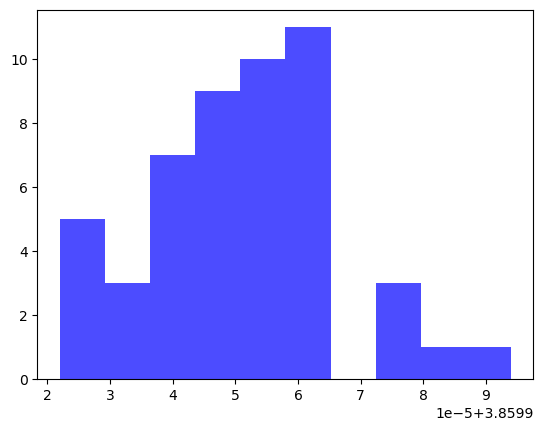

In [16]:
GG = []
for file in glob.glob("*.endf"):
    endf_tape = Tape.from_file(file)
    mf2 = endf_tape.MAT(endf_tape.material_numbers[0]).MF(2).MT(151).parse()
    GG.append(mf2.isotopes[0].resonance_ranges[0].parameters.l_values[0].GG[6])
    
print(GG*10)

plt.hist(np.array(GG)*100, bins=10, color='blue', alpha=0.7)
plt.show()

In [3]:
import pandas as pd
from IPython.display import display, HTML

# Convert the covariance matrix to a pandas DataFrame
cov_matrix_df = pd.DataFrame(sampler.covariance_objects[0].covariance_matrix[:20, :20])

# Display the DataFrame as HTML with scrollable option
display(HTML(cov_matrix_df.to_html(notebook=True)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.492294e-06,-6.191081e-07,1.778502e-09,6.492368e-07,-4.556055e-07,-1.319867e-09,-1.331640e-06,-1.162297e-06,1.980376e-08,-2.071568e-06,-1.199722e-06,-1.889055e-08,-1.187737e-06,9.112256e-07,1.350845e-07,4.046745e-05,-9.026327e-09,-1.242214e-06,-1.064608e-06,5.289601e-09
1,-6.191081e-07,3.554733e-06,-1.873770e-10,1.555851e-06,-1.152883e-06,-1.418654e-08,-4.441855e-07,-3.985981e-07,-2.783933e-08,-8.379743e-07,-1.673628e-07,-3.810637e-08,-3.808242e-07,3.627509e-07,-4.696503e-08,-1.273189e-05,-3.456779e-08,-3.973126e-07,-3.762406e-07,-4.424055e-08
2,1.778502e-09,-1.873770e-10,2.619940e-12,1.116015e-09,-7.739200e-10,-8.119460e-13,8.205510e-11,7.384270e-11,-3.500420e-12,1.181880e-10,9.761970e-11,-9.439990e-13,7.438610e-11,-5.580700e-11,-1.272420e-11,-2.676825e-09,-1.364280e-12,7.791970e-11,6.348690e-11,-3.216380e-12
3,6.492368e-07,1.555851e-06,1.116015e-09,1.842137e-06,-1.173798e-06,-2.742260e-10,2.255438e-08,1.837429e-08,-1.028645e-09,3.255565e-08,1.843416e-08,-3.411920e-10,2.012081e-08,-1.316123e-08,-5.466516e-09,-1.851780e-06,-5.778870e-10,2.125437e-08,1.821208e-08,-1.133319e-09
4,-4.556055e-07,-1.152883e-06,-7.739200e-10,-1.173798e-06,9.071800e-07,-4.147400e-10,5.950399e-08,5.228358e-08,-2.115790e-09,8.668083e-08,6.791543e-08,-2.777430e-10,5.383208e-08,-3.972931e-08,-8.088284e-09,-2.091446e-06,-6.372690e-10,5.616282e-08,4.587847e-08,-1.781903e-09
5,-1.319867e-09,-1.418654e-08,-8.119460e-13,-2.742260e-10,-4.147400e-10,1.213496e-09,5.371136e-08,4.812850e-08,2.096166e-09,9.645961e-08,2.765565e-08,3.439764e-09,4.680064e-08,-4.155430e-08,2.051025e-09,4.288704e-07,3.005758e-09,4.896163e-08,4.506519e-08,3.645175e-09
6,-1.331640e-06,-4.441855e-07,8.205510e-11,2.255438e-08,5.950399e-08,5.371136e-08,4.424720e-06,3.854133e-06,5.923344e-08,7.367986e-06,3.067839e-06,1.772494e-07,3.862879e-06,-3.208571e-06,-1.201069e-07,-4.290402e-05,1.434822e-07,4.038261e-06,3.596942e-06,1.487418e-07
7,-1.162297e-06,-3.985981e-07,7.384270e-11,1.837429e-08,5.228358e-08,4.812850e-08,3.854133e-06,3.439170e-06,5.294868e-08,6.489259e-06,2.695688e-06,1.568270e-07,3.402175e-06,-2.825902e-06,-1.034895e-07,-3.714372e-05,1.269810e-07,3.556647e-06,3.167964e-06,1.319186e-07
8,1.980376e-08,-2.783933e-08,-3.500420e-12,-1.028645e-09,-2.115790e-09,2.096166e-09,5.923344e-08,5.294868e-08,4.268680e-09,1.133884e-07,1.848707e-08,5.564526e-09,5.036568e-08,-4.857234e-08,7.239153e-09,1.821829e-06,5.058364e-09,5.279896e-08,5.080301e-08,6.574273e-09
9,-2.071568e-06,-8.379743e-07,1.181880e-10,3.255565e-08,8.668083e-08,9.645961e-08,7.367986e-06,6.489259e-06,1.133884e-07,1.244266e-05,4.956322e-06,3.107124e-07,6.464686e-06,-5.396821e-06,-1.626117e-07,-6.141407e-05,2.537889e-07,6.758224e-06,6.031804e-06,2.688164e-07


In [4]:
# endf_tape = Tape.from_file('/home/sole-pie01/ndlib/endfb8-neutron/n-094_Pu_239.endf')
endf_tape = Tape.from_file('/home/sole-pie01/ndlib/endfb8-neutron/n-017_Cl_037.endf')

MAT = endf_tape.MAT(endf_tape.material_numbers[0])
mf32 = endf_tape.MAT(endf_tape.material_numbers[0]).MF(32).MT(151).parse()
dim = mf32.isotopes[0].resonance_ranges[0].parameters.short_range_blocks[0].covariance_matrix_order

cov_matrix = np.zeros((dim, dim))

# Use numpy indexing for direct assignment to upper triangle
triu_indices = np.triu_indices(dim)
cov_matrix[triu_indices] = mf32.isotopes[0].resonance_ranges[0].parameters.short_range_blocks[0].covariance_matrix

# Make it symmetric
cov_matrix = cov_matrix + cov_matrix.T - np.diag(np.diag(cov_matrix))

print(cov_matrix.shape)
# Remove null (1e-10) variance parameters from cov_matrix
threshold = 1e-10
null_variance_indices = np.where(np.diag(cov_matrix) < threshold)[0]
cov_matrix = np.delete(cov_matrix, null_variance_indices, axis=0)
cov_matrix = np.delete(cov_matrix, null_variance_indices, axis=1)

dim = cov_matrix.shape[0]
# convert cov_matrix to corr_mat
corr_mat = np.zeros((dim, dim))
for i in range(dim):
    for j in range(dim):
        corr_mat[i, j] = cov_matrix[i, j] / np.sqrt(cov_matrix[i, i] * cov_matrix[j, j])
        
print(corr_mat.shape)
# print eigenvalues
eigenvalues = np.linalg.eigvals(corr_mat)
print("Eigenvalues of the covariance matrix:")
print(eigenvalues)
# Print condition number
condition_number = np.linalg.cond(corr_mat)
print("Condition number of the covariance matrix:")
print(condition_number)

(447, 447)
(438, 438)
Eigenvalues of the covariance matrix:
[3.24496335 3.20853576 3.08032522 2.84143297 2.77655027 2.60668366
 2.44493309 2.33225813 2.26878115 2.12059293 2.10427094 2.09080914
 2.07731228 2.05193294 2.02028618 1.9950998  1.95477849 1.8136302
 1.81960174 1.76137906 1.71792637 1.65744649 1.65079102 1.65349137
 0.07705066 0.09601516 0.11758062 0.13422486 0.15916449 0.16651183
 0.20536198 0.21002407 0.2222412  0.25426727 0.25918055 0.27179449
 0.27411554 0.28059522 0.28156147 0.43944478 0.42821835 0.42406436
 0.41495207 0.30094138 0.31862671 0.32968771 0.32541625 0.32690063
 0.34959231 0.37838593 0.37516878 0.36129666 0.36691013 1.58929538
 1.5801163  1.53843142 1.49214124 0.54829762 0.4562475  0.53399464
 0.5296011  0.47853946 0.5036658  0.49939428 0.48616816 0.49402579
 0.49084219 1.42048468 1.41254575 1.40376343 1.37493359 0.54419436
 0.63037405 0.61010018 0.61816949 0.58067288 0.58483246 0.58337776
 1.33892672 1.32471564 1.30795343 1.30395167 1.30282978 1.28190007
 1.

In [34]:
# Compute eigenvalues
eigenvalues = np.linalg.eigvals(corr_mat)

# Set a threshold for numerical precision
eigenvalue_threshold = 1e-12
filtered_eigenvalues = [eig for eig in eigenvalues if abs(eig) > eigenvalue_threshold]

print("Eigenvalues of the covariance matrix (filtered):")
print(filtered_eigenvalues)

# Print condition number
condition_number = np.linalg.cond(corr_mat)
print("Condition number of the covariance matrix:")
print(condition_number)

Eigenvalues of the covariance matrix (filtered):
[np.float64(428.16253412846356), np.float64(212.54937442373372), np.float64(9.118348730517893), np.float64(4.2775886791713), np.float64(1.561197822185986), np.float64(0.6663167005035823), np.float64(0.5767632537117248), np.float64(0.5470804150454137), np.float64(0.48202889084135697), np.float64(0.47993574733580147), np.float64(0.45544978119147017), np.float64(0.4374903057978599), np.float64(0.42014156401899166), np.float64(0.4112439268812697), np.float64(0.40324097184950225), np.float64(0.3844634166311696), np.float64(0.3708040853715314), np.float64(0.3632677254679187), np.float64(0.3665888408656881), np.float64(0.3034586811820292), np.float64(0.3001164951242478), np.float64(0.2970306174252643), np.float64(0.2802474406804863), np.float64(0.25246624228468767), np.float64(0.2509514247678584), np.float64(0.2427881414353167), np.float64(0.23801409653621886), np.float64(0.22786095969849104), np.float64(0.2208506868946904), np.float64(0.214293

In [36]:
np.max(eigenvalues) / np.min(eigenvalues)

np.float64(-33345.06554509264)

In [6]:
# Extract the variance vector (diagonal elements of the covariance matrix)
variance_vector = np.diag(cov_matrix)

# Identify indices where variance is non-zero
non_zero_variance_indices = np.where(variance_vector != 0)[0]

# Filter the covariance matrix to remove null-variance parameters
filtered_cov_matrix = cov_matrix[np.ix_(non_zero_variance_indices, non_zero_variance_indices)]

# Update the variance vector to exclude null-variance parameters
filtered_variance_vector = variance_vector[non_zero_variance_indices]

# Compute the standard deviation vector for the filtered covariance matrix
filtered_std_dev_vector = np.sqrt(filtered_variance_vector)

# Compute the correlation matrix for the filtered covariance matrix
filtered_correlation_matrix = filtered_cov_matrix / np.outer(filtered_std_dev_vector, filtered_std_dev_vector)

# Print the first 10x10 coefficients of the filtered correlation matrix with 5 significant digits
np.set_printoptions(precision=2, suppress=True)
print(filtered_correlation_matrix[:10, :10])

[[ 1.   -0.92  0.02  0.07  0.    0.08  0.1  -0.   -0.    0.01]
 [-0.92  1.   -0.02 -0.07 -0.03 -0.07 -0.09 -0.08  0.   -0.01]
 [ 0.02 -0.02  1.    0.17  0.02 -0.    0.   -0.    0.    0.  ]
 [ 0.07 -0.07  0.17  1.    0.04  0.01  0.01 -0.   -0.    0.  ]
 [ 0.   -0.03  0.02  0.04  1.    0.    0.   -0.   -0.    0.  ]
 [ 0.08 -0.07 -0.    0.01  0.    1.    0.08 -0.    0.   -0.  ]
 [ 0.1  -0.09  0.    0.01  0.    0.08  1.    0.02  0.   -0.03]
 [-0.   -0.08 -0.   -0.   -0.   -0.    0.02  1.    0.   -0.  ]
 [-0.    0.    0.   -0.   -0.    0.    0.    0.    1.   -0.02]
 [ 0.01 -0.01  0.    0.    0.   -0.   -0.03 -0.   -0.02  1.  ]]


[0.95459413, 0.97679335, 0.93245473, 0.96067096, 0.92786311]


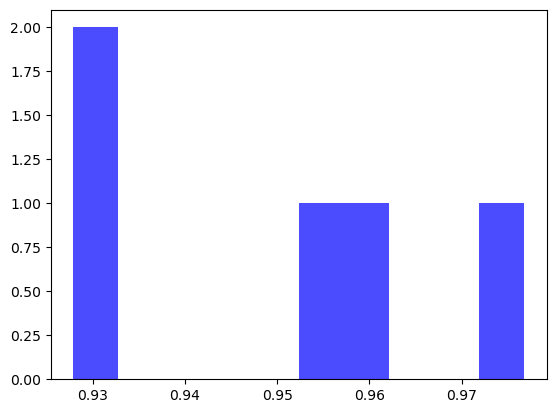

In [6]:
GG = []
for file in glob.glob("*.endf"):
    endf_tape = Tape.from_file(file)
    mf2 = endf_tape.MAT(endf_tape.material_numbers[0]).MF(2).MT(151).parse()
    GG.append(mf2.isotopes[0].resonance_ranges[0].parameters.AP)
    
print(GG)

plt.hist(np.array(GG), bins=10, color='blue', alpha=0.7)
plt.show()

In [4]:
from scipy.stats import shapiro, norm
import numpy as np
import glob

GG3 = []
for file in glob.glob("*.endf"):
    endf_tape = Tape.from_file(file)
    mf2 = endf_tape.MAT(endf_tape.material_numbers[0]).MF(2).MT(151).parse()
    GG3.append(mf2.isotopes[0].resonance_ranges[0].parameters.l_values[0].GG[4])

# Calculate mean and standard deviation
mean_GG3 = np.mean(GG3)
std_GG3 = np.std(GG3, ddof=1)

# Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(GG3)
is_gaussian = p_value > 0.05  # If p-value > 0.05, data is Gaussian

# Calculate 95% confidence interval for the mean
n = len(GG3)
confidence_interval = norm.interval(0.95, loc=mean_GG3, scale=std_GG3 / np.sqrt(n))

# Print results
print(f"Mean: {mean_GG3}")
print(f"Standard Deviation: {std_GG3}")
print(f"Is Gaussian: {'Yes' if is_gaussian else 'No'} (p-value: {p_value})")
print(f"95% Confidence Interval for the Mean: {confidence_interval}")

Mean: 0.021029219999999998
Standard Deviation: 1.9999999999881224e-08
Is Gaussian: No (p-value: 0.0012407259151036264)
95% Confidence Interval for the Mean: (np.float64(0.021029200400360153), np.float64(0.021029239599639843))


In [39]:
mf3 = endf_tape.MAT(endf_tape.material_numbers[0]).MF(3).parse()
iMT = 1
en1 = np.array(mf3.MT(iMT).energies)
xs1 = np.array(mf3.MT(iMT).cross_sections)

# Calculate average cross section across the full energy range
average_xs = np.mean(xs1)
print(f"Average cross section between {en1[0]} eV and {en1[-1]} eV: {average_xs:.3f} barns")


Average cross section between 1e-05 eV and 20000000.0 eV: 9.410 barns


In [ ]:
# Compute the integral using the trapezoidal rule
integral = np.trapezoid(xs1, en1)
print(f"Integral of cross section between {en1[0]} eV and {en1[-1]} eV: {integral:.3f} barn·eV")

Integral of cross section between 1e-05 eV and 20000000.0 eV: 317650.489 barn·eV


In [10]:
transformed_df = pd.read_csv('transformed_samples_Uncertainty_RM_RRR.csv')
transformed_df.head()

,# Row,GN_L0_R0,GG_L0_R0,ER_L0_R1,GN_L0_R1,GG_L0_R1,ER_L0_R2,GN_L0_R2,GG_L0_R2,ER_L0_R3,...,GG_L0_R3,ER_L0_R4,GN_L0_R4,GG_L0_R4,ER_L0_R5,GN_L0_R5,GG_L0_R5,ER_L0_R6,GN_L0_R6,GG_L0_R6
0,Nominal,9.556,0.225,8320.816,78.704,0.196,25579.300,652.216,0.513,46653.160,...,0.265,93137.970,726.630,0.221,97900.810,1.448,0.707,127757.100,391.026,0.268
1,Uncertainty,0.744,0.030,3.012,4.758,0.023,14.148,67.878,0.123,9.656,...,0.095,13.855,110.027,0.086,36.277,1.609,0.931,13.943,70.029,0.158
2,SampleMean,9.556,0.225,8320.818,78.704,0.196,25579.322,652.181,0.513,46653.159,...,0.266,93137.985,726.595,0.222,97900.824,1.955,1.066,127757.080,390.972,0.283
3,SampleStdDev,0.727,0.030,3.081,4.329,0.023,13.315,68.163,0.124,9.593,...,0.096,13.416,107.487,0.081,35.603,1.214,0.704,13.739,65.951,0.140
4,MeanPctDiff,0.003,-0.002,0.000,0.000,-0.028,0.000,-0.005,0.024,-0.000,...,0.275,0.000,-0.005,0.503,0.000,34.955,50.755,-0.000,-0.014,5.496


Comparison of statistics (sorted by absolute mean % difference):
            Nominal Sample Mean Mean % Diff Expected STD Sample STD STD % Diff
GG_L0_R5      0.707       1.066      50.755        0.931      0.704    -24.380
GN_L0_R5      1.448       1.955      34.955        1.609      1.214    -24.530
GG_L0_R6      0.268       0.283       5.496        0.158      0.140    -11.390
GG_L0_R4      0.221       0.222       0.503        0.086      0.081     -6.352
GG_L0_R3      0.265       0.266       0.275        0.095      0.096      0.935
GG_L0_R1      0.196       0.196      -0.028        0.023      0.023     -1.471
GG_L0_R2      0.513       0.513       0.024        0.123      0.124      1.322
GN_L0_R6    391.026     390.972      -0.014       70.029     65.951     -5.823
GN_L0_R2    652.216     652.181      -0.005       67.878     68.163      0.420
GN_L0_R4    726.630     726.595      -0.005      110.027    107.487     -2.309
GN_L0_R0      9.556       9.556       0.003        0.744      0.72

/tmp/ipykernel_9188/949026458.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comparison_df_sorted.index[:10],


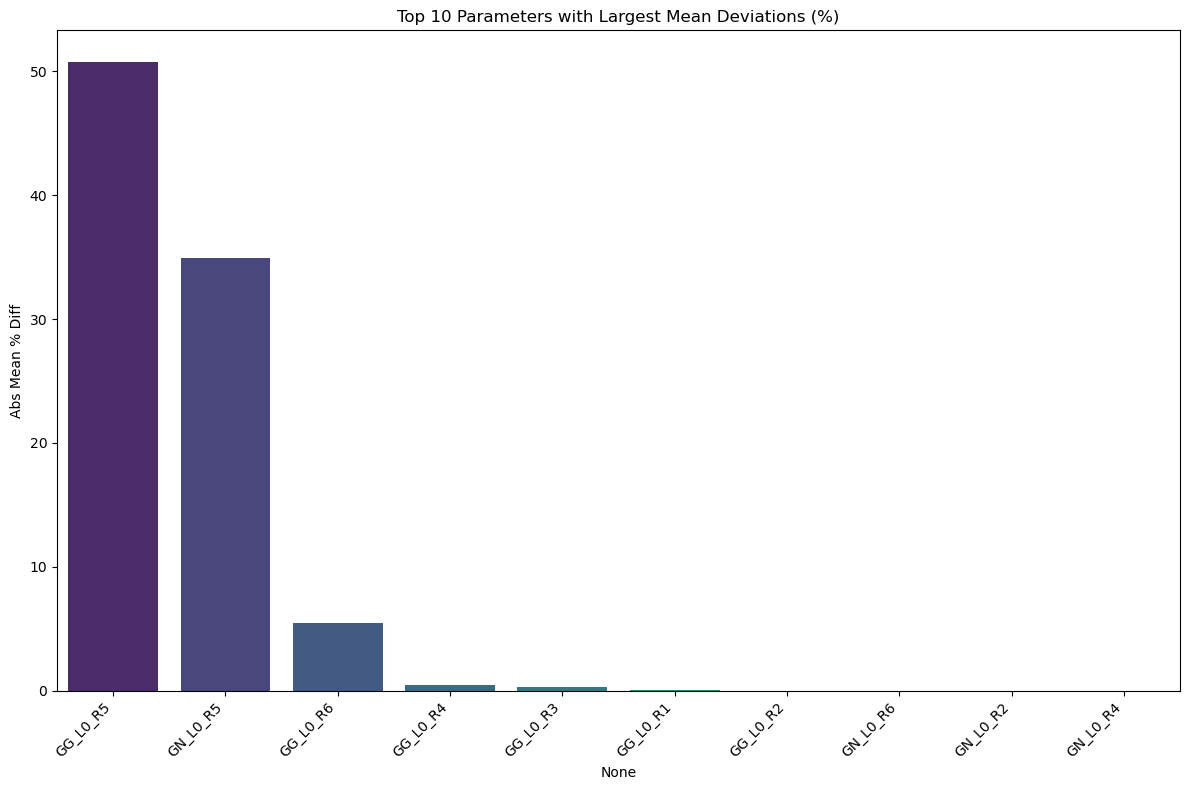

/tmp/ipykernel_9188/949026458.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comparison_df_sorted.sort_values('Abs STD % Diff', ascending=False).index[:10],


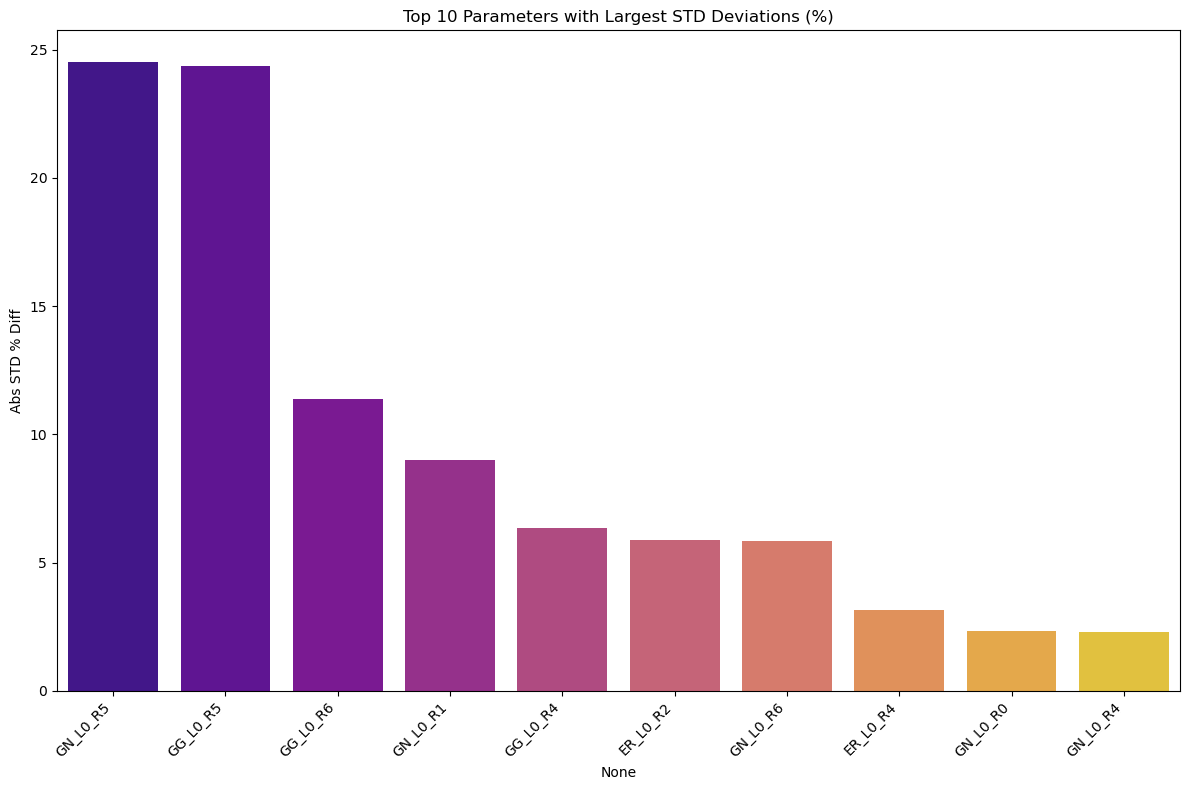

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The dataset is already loaded as transformed_df
# First row contains nominal values, second row contains uncertainties, rows 3+ contain samples

# Extract the first row (nominal values) and second row (uncertainties)
nominal_values = transformed_df.iloc[0].drop('# Row')
uncertainties = transformed_df.iloc[1].drop('# Row')
sample_means = transformed_df.loc[2].drop('# Row')
sample_stds = transformed_df.loc[3].drop('# Row')
meanpctdiff = transformed_df.iloc[4].drop('# Row')
stdpctdiff = transformed_df.iloc[5].drop('# Row')

# Calculate statistics on the samples (rows 6 and beyond)
actual_samples = transformed_df.iloc[6:].set_index('# Row')

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Nominal': nominal_values,
    'Sample Mean': sample_means,
    'Mean % Diff': meanpctdiff,
    'Expected STD': uncertainties,
    'Sample STD': sample_stds,
    'STD % Diff': stdpctdiff
})

# Sort by absolute percentage difference in means to highlight the most "off" parameters
comparison_df['Abs Mean % Diff'] = abs(comparison_df['Mean % Diff'])
comparison_df['Abs STD % Diff'] = abs(comparison_df['STD % Diff'])
comparison_df_sorted = comparison_df.sort_values('Abs Mean % Diff', ascending=False)

# Print the sorted comparison to highlight the parameters with largest deviations
print("Comparison of statistics (sorted by absolute mean % difference):")
pd.set_option('display.float_format', '{:.3f}'.format)
print(comparison_df_sorted[['Nominal', 'Sample Mean', 'Mean % Diff', 'Expected STD', 'Sample STD', 'STD % Diff']])

# Calculate the average relative difference for means and standard deviations
mean_rel_diff = abs((nominal_values - sample_means) / nominal_values).mean() * 100
std_rel_diff = abs((uncertainties - sample_stds) / uncertainties).mean() * 100

print(f"\nAverage relative difference in means: {mean_rel_diff:.2f}%")
print(f"Average relative difference in standard deviations: {std_rel_diff:.2f}%")

# Create a visualization of the most significant deviations
plt.figure(figsize=(12, 8))
sns.barplot(x=comparison_df_sorted.index[:10], 
            y='Abs Mean % Diff', 
            data=comparison_df_sorted[:10],
            palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Parameters with Largest Mean Deviations (%)')
plt.tight_layout()
plt.show()

# Plot the uncertainty deviations as well
plt.figure(figsize=(12, 8))
sns.barplot(x=comparison_df_sorted.sort_values('Abs STD % Diff', ascending=False).index[:10], 
            y='Abs STD % Diff', 
            data=comparison_df_sorted.sort_values('Abs STD % Diff', ascending=False)[:10],
            palette='plasma')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Parameters with Largest STD Deviations (%)')
plt.tight_layout()
plt.show()

In [4]:
# Compute the covariance matrix for the transformed DataFrame
covariance_matrix = transformed_df.corr()

# Print the covariance matrix
print(covariance_matrix)

          GN_L0_R0  GG_L0_R0  ER_L0_R1  GN_L0_R1  GG_L0_R1  ER_L0_R2  \
GN_L0_R0  1.000000 -0.915744 -0.012860  0.062070  0.004123  0.119742   
GG_L0_R0 -0.915744  1.000000  0.038096 -0.033311 -0.046141 -0.102083   
ER_L0_R1 -0.012860  0.038096  1.000000  0.185214  0.067676  0.010561   
GN_L0_R1  0.062070 -0.033311  0.185214  1.000000  0.084767  0.032529   
GG_L0_R1  0.004123 -0.046141  0.067676  0.084767  1.000000  0.038609   
ER_L0_R2  0.119742 -0.102083  0.010561  0.032529  0.038609  1.000000   
GN_L0_R2  0.129460 -0.152194 -0.019805 -0.051344  0.089891  0.035415   
GG_L0_R2  0.001671 -0.075987  0.018965 -0.030673 -0.001859  0.048522   
ER_L0_R3 -0.022571  0.021058 -0.061355  0.024900  0.044168 -0.001357   
GN_L0_R3  0.052216 -0.024062  0.113113 -0.048308 -0.054000  0.038672   
GG_L0_R3  0.043526 -0.035483 -0.081613  0.070251  0.092693  0.043970   
ER_L0_R4  0.024640 -0.023627  0.030007 -0.037556 -0.107069 -0.029262   
GN_L0_R4 -0.017827 -0.002241 -0.032985 -0.017790  0.029377 -0.06